### 금융 시장의 수익률 (Financial Market Return)
- 일반적으로 금융 시장을 분석하거나 머신러닝 모델을 구축할 때 price가 아닌 return을 활용하는 경우가 많다.
- 수익률을 통해 복리계산과 연율화(1년 간의 성장률)등을 위해 무수히 많은 반복 계산을 하게 되므로  
  (1 + return)으로 계산할 경우 복잡하고 번거로워진다.
- 기존 return에 log를 취해주면, 더 편한 계산이 가능해지지만 당연히 약간의 오차는 발생하게 된다.
- 약간의 오차를 감수하고 로그를 사용함으로써 얻은 이득이 훨씬 많고, 국내 주식에서의 상한선과 하한선은 -30% ~ 30% 제약까지 있기 때문에 일반적인 주가 움직임에 대해 오차가 극히 적다.
- 즉, 로그를 취하는 것은 정밀성보다 편의성을 높인 것으로 이해하면 된다.
- 수익률 단위가 분, 초, 밀리초 이하로 내려가야 정밀성에 차이가 많이 발생하지만, 실제 금융시장에서는  
  최소 하루 단위 이상으로 계산하기 때문에 오차가 거의 발생하지 않게 된다.
- 또한, return에 로그를 취하면 우측으로 치우친 확률 분포를 중심으로 재조정해주는 효과까지 있기 때문에 안쓸 이유가 없다.

<img src='./images/log_return.png'>

In [1]:
import yfinance as yf

# VIX는 투자자들이 향후 30일간 S&P 500지수가 얼마나 변동할 것인지를 반영한 지수이다
# 투자자들이 투자 결정을 내리기 전에 시장 리스크, 공포 및 스트레스를 측정하는 데 사용한다.
columns = ['AAPL', 'MSFT', 'INTC', 'AMZN', 'GS', 'SPY', '^SPX', '^VIX', 'EURUSD=X', '^XAU', 'GDX', 'GLD']

f_df = yf.download(columns, start='2010-01-01')['Adj Close'].round(4)
f_df

[*********************100%%**********************]  12 of 12 completed


Ticker,AAPL,AMZN,EURUSD=X,GDX,GLD,GS,INTC,MSFT,SPY,^SPX,^VIX,^XAU
Date,,,,,,,,,,,,
2010-01-01,NaN,NaN,1.4390,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-04,6.4620,6.6950,1.4424,42.1804,109.80,134.7607,13.6604,23.3894,86.8601,1132.9900,20.04,174.020
2010-01-05,6.4731,6.7345,1.4366,42.5870,109.70,137.1431,13.6539,23.3970,87.0900,1136.5200,19.35,176.020
2010-01-06,6.3702,6.6125,1.4404,43.6215,111.51,135.6794,13.6081,23.2534,87.1513,1137.1400,19.16,180.760
2010-01-07,6.3584,6.5000,1.4318,43.4093,110.82,138.3344,13.4773,23.0116,87.5192,1141.6899,19.06,179.210
...,...,...,...,...,...,...,...,...,...,...,...,...
2024-06-06,194.4800,185.0000,1.0875,36.0100,219.43,458.1000,30.4200,424.5200,534.6600,5352.9600,12.58,145.380
2024-06-07,196.8900,184.3000,1.0894,33.5400,211.60,454.9100,30.7400,423.8500,534.0100,5346.9902,12.22,136.200
2024-06-10,193.1200,187.0600,1.0779,34.0300,213.54,453.5500,30.9100,427.8700,535.6600,5360.7900,12.74,138.180


In [2]:
f_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3769 entries, 2010-01-01 to 2024-06-12
Freq: B
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   AAPL      3634 non-null   float64
 1   AMZN      3634 non-null   float64
 2   EURUSD=X  3763 non-null   float64
 3   GDX       3634 non-null   float64
 4   GLD       3634 non-null   float64
 5   GS        3634 non-null   float64
 6   INTC      3634 non-null   float64
 7   MSFT      3634 non-null   float64
 8   SPY       3634 non-null   float64
 9   ^SPX      3634 non-null   float64
 10  ^VIX      3634 non-null   float64
 11  ^XAU      3634 non-null   float64
dtypes: float64(12)
memory usage: 382.8 KB


In [3]:
# 참고
# 인덱스를 원하는 컬럼으로 변경한 뒤, DatetimeIndex으로 변환
# pd.read_scv('path', index_col='날짜 컬럼명', parse_dates=True)

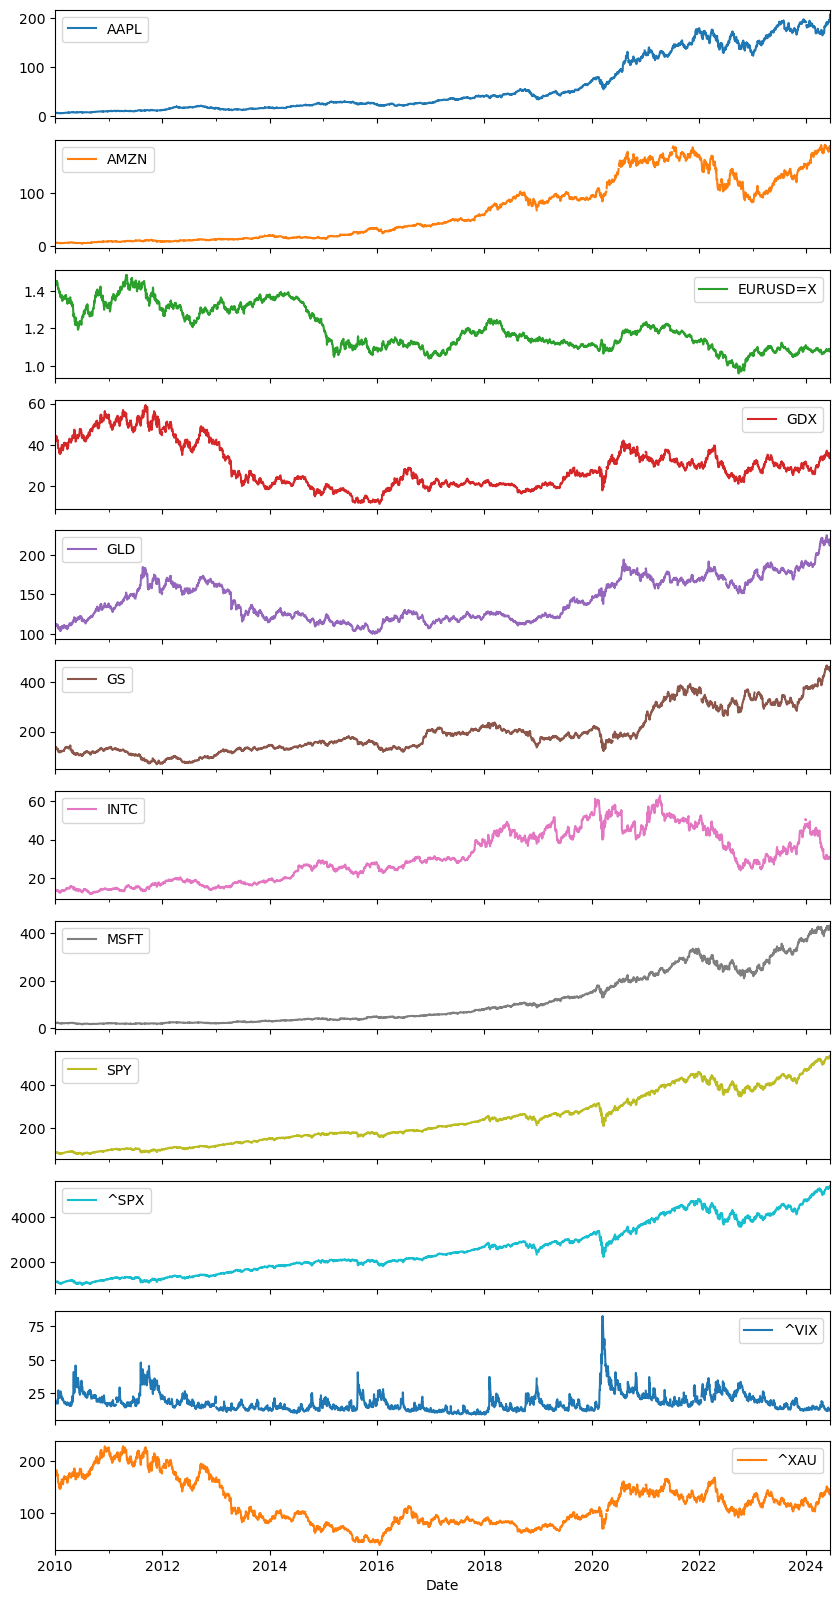

In [4]:
import matplotlib.pyplot as plt

f_df.plot(figsize=(10, 20), subplots= True)
plt.show()

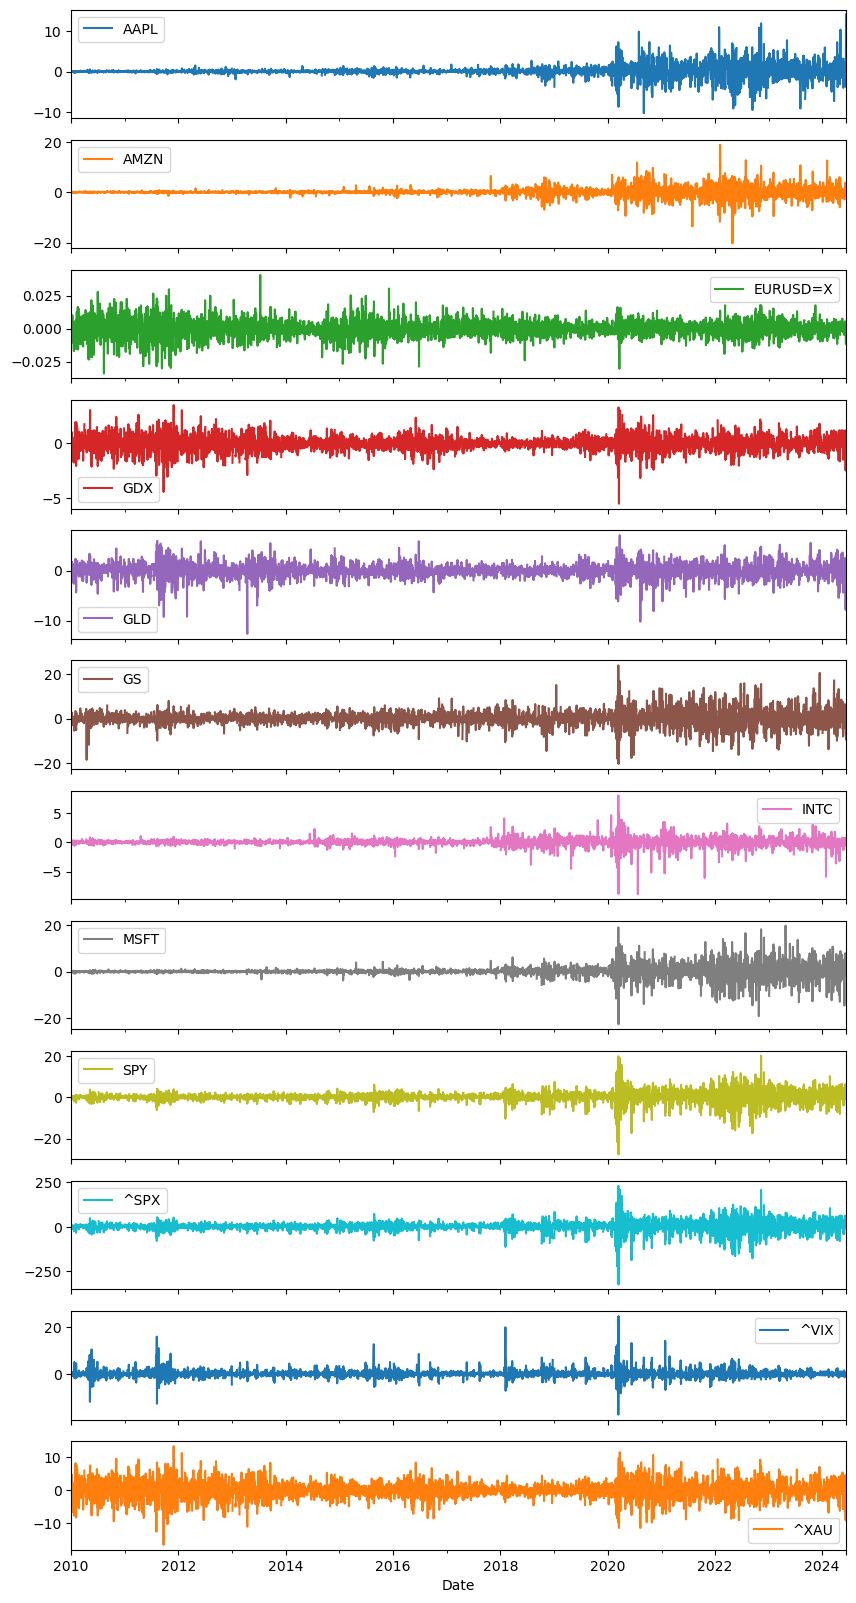

In [5]:
f_df.diff().plot(figsize=(10, 20), subplots= True)
plt.show()

/var/folders/f7/gl6wpvqx5z596rbpjsq5n3tc0000gn/T/ipykernel_55035/3520268453.py:2: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  f_df.pct_change().mean().plot(kind='bar',figsize=(7,5), grid=True)


<Axes: xlabel='Ticker'>

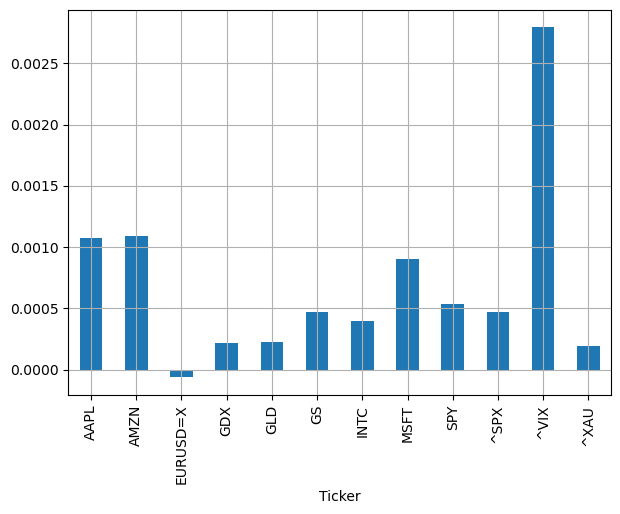

In [6]:
# 변화율! 확인
f_df.pct_change().mean().plot(kind='bar',figsize=(7,5), grid=True)

In [7]:
# 수익률을 구히기 위해 shift 를 사용해서 이동 시켜서 값을 확인 한다 
# (이유: 수익률 => 오늘 수익값 / 어제 수익값 * 100)
display(f_df.shift(1).head(4))
display(f_df.head(4))
display(f_df.shift(-1).head(4))

Ticker,AAPL,AMZN,EURUSD=X,GDX,GLD,GS,INTC,MSFT,SPY,^SPX,^VIX,^XAU
Date,,,,,,,,,,,,
2010-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-04,NaN,NaN,1.4390,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-05,6.4620,6.6950,1.4424,42.1804,109.8,134.7607,13.6604,23.3894,86.8601,1132.99,20.04,174.02
2010-01-06,6.4731,6.7345,1.4366,42.5870,109.7,137.1431,13.6539,23.3970,87.0900,1136.52,19.35,176.02


Ticker,AAPL,AMZN,EURUSD=X,GDX,GLD,GS,INTC,MSFT,SPY,^SPX,^VIX,^XAU
Date,,,,,,,,,,,,
2010-01-01,NaN,NaN,1.4390,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-04,6.4620,6.6950,1.4424,42.1804,109.80,134.7607,13.6604,23.3894,86.8601,1132.99,20.04,174.02
2010-01-05,6.4731,6.7345,1.4366,42.5870,109.70,137.1431,13.6539,23.3970,87.0900,1136.52,19.35,176.02
2010-01-06,6.3702,6.6125,1.4404,43.6215,111.51,135.6794,13.6081,23.2534,87.1513,1137.14,19.16,180.76


Ticker,AAPL,AMZN,EURUSD=X,GDX,GLD,GS,INTC,MSFT,SPY,^SPX,^VIX,^XAU
Date,,,,,,,,,,,,
2010-01-01,6.4620,6.6950,1.4424,42.1804,109.80,134.7607,13.6604,23.3894,86.8601,1132.9900,20.04,174.02
2010-01-04,6.4731,6.7345,1.4366,42.5870,109.70,137.1431,13.6539,23.3970,87.0900,1136.5200,19.35,176.02
2010-01-05,6.3702,6.6125,1.4404,43.6215,111.51,135.6794,13.6081,23.2534,87.1513,1137.1400,19.16,180.76
2010-01-06,6.3584,6.5000,1.4318,43.4093,110.82,138.3344,13.4773,23.0116,87.5192,1141.6899,19.06,179.21


In [8]:
import numpy as np

# 수익률 df
rate_f_df = np.log(f_df / f_df.shift(1))
rate_f_df

Ticker,AAPL,AMZN,EURUSD=X,GDX,GLD,GS,INTC,MSFT,SPY,^SPX,^VIX,^XAU
Date,,,,,,,,,,,,
2010-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-04,NaN,NaN,0.002360,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-05,0.001716,0.005883,-0.004029,0.009593,-0.000911,0.017524,-0.000476,0.000325,0.002643,0.003111,-0.035038,0.011427
2010-01-06,-0.016024,-0.018282,0.002642,0.024001,0.016365,-0.010730,-0.003360,-0.006156,0.000704,0.000545,-0.009868,0.026573
2010-01-07,-0.001854,-0.017160,-0.005988,-0.004876,-0.006207,0.019379,-0.009658,-0.010453,0.004213,0.003993,-0.005233,-0.008612
...,...,...,...,...,...,...,...,...,...,...,...,...
2024-06-06,-0.007122,0.020313,-0.000643,0.034467,0.007364,-0.007785,-0.011765,0.001202,-0.000019,-0.000200,-0.003967,0.031798
2024-06-07,0.012316,-0.003791,0.001746,-0.071058,-0.036336,-0.006988,0.010464,-0.001579,-0.001216,-0.001116,-0.029034,-0.065227
2024-06-10,-0.019333,0.014865,-0.010612,0.014504,0.009126,-0.002994,0.005515,0.009440,0.003085,0.002578,0.041673,0.014433


<Axes: xlabel='Date'>

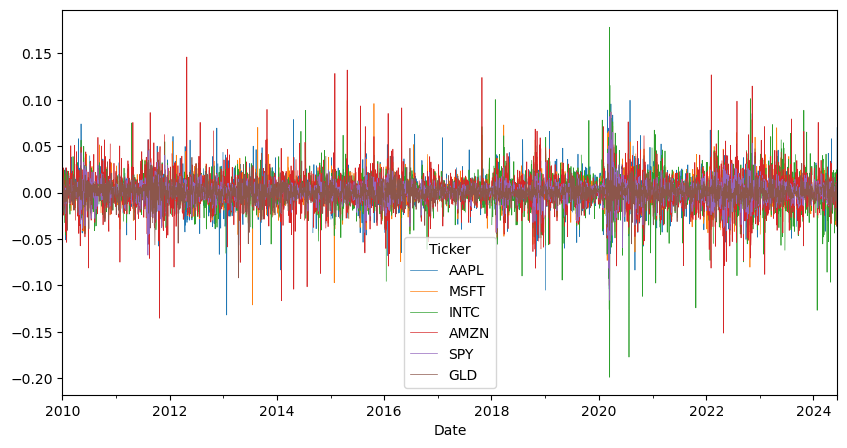

In [9]:
# 일간 수익률

rate_f_df[['AAPL', 'MSFT', 'INTC', 'AMZN', 'SPY', 'GLD']].plot(figsize=(10, 5), lw=0.5)

In [10]:
# 연율화
# 연간 영업일(약 252일로 계산)
# 252 = (통상적으로) 1년 영업률 

# 해당 코드는 log가 씌워져있는 상황
rate_f_df.mean() * 252

Ticker
AAPL        0.236618
AMZN        0.201643
EURUSD=X   -0.020283
GDX        -0.013668
GLD         0.039135
GS          0.094566
INTC        0.053515
MSFT        0.197852
SPY         0.128720
^SPX        0.110978
^VIX       -0.344346
^XAU       -0.014741
dtype: float64

In [11]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor

def get_vif(features):
    vif = pd.DataFrame()
    vif["vif_score"] = [variance_inflation_factor(features.values, i) for i in range(features.shape[1])]
    vif["feature"] = features.columns    
    return vif

In [12]:
rate_f_df = rate_f_df.dropna()
get_vif(rate_f_df)

,vif_score,feature
0,2.003978,AAPL
1,1.688426,AMZN
2,1.005267,EURUSD=X
3,23.015010,GDX
4,2.392765,GLD
5,2.326588,GS
6,1.759425,INTC
7,2.626577,MSFT
8,402.733521,SPY
9,401.691849,^SPX


array([[<Axes: title={'center': 'AAPL'}>,
        <Axes: title={'center': 'AMZN'}>,
        <Axes: title={'center': 'EURUSD=X'}>],
       [<Axes: title={'center': 'GDX'}>, <Axes: title={'center': 'GLD'}>,
        <Axes: title={'center': 'GS'}>],
       [<Axes: title={'center': 'INTC'}>,
        <Axes: title={'center': 'MSFT'}>,
        <Axes: title={'center': 'SPY'}>],
       [<Axes: title={'center': '^SPX'}>,
        <Axes: title={'center': '^VIX'}>,
        <Axes: title={'center': '^XAU'}>]], dtype=object)

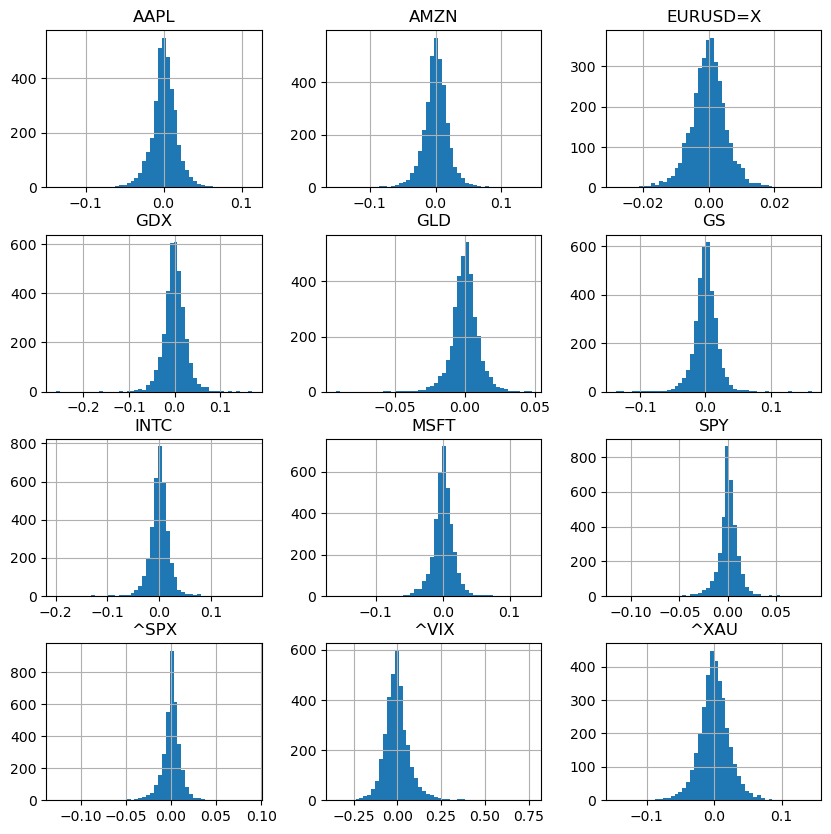

In [13]:
rate_f_df.hist(figsize = (10, 10), bins=50 )

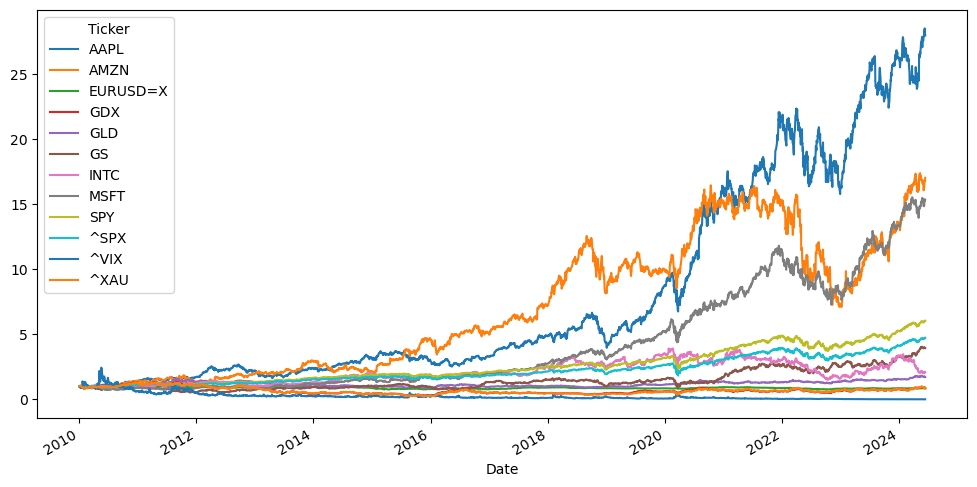

In [14]:
# 각 원소들의 누적합 : cumsum()
# 일간 수익률
rate_f_df.cumsum().apply(np.exp).plot(figsize=(12, 6))
plt.show()

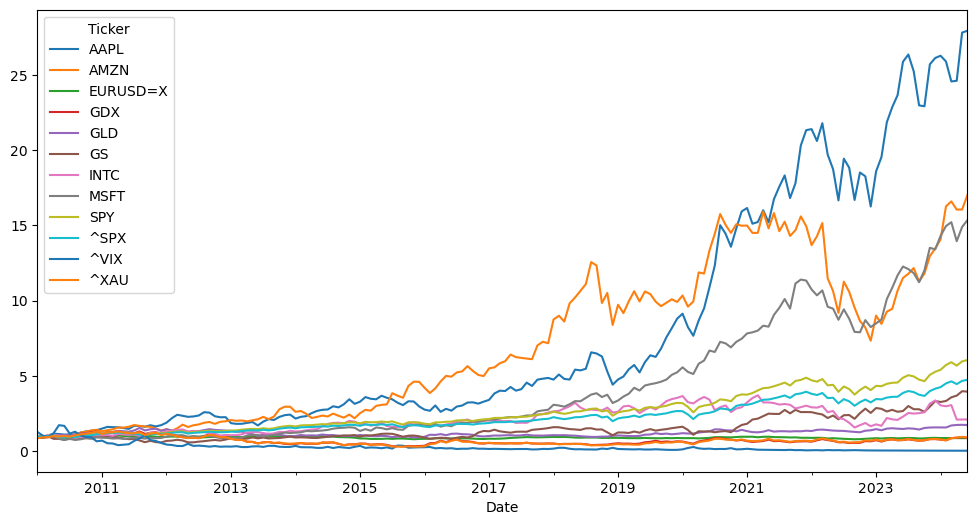

In [15]:
# 월간 수익률
rate_f_df.cumsum().apply(np.exp).resample('1m').last().plot(figsize=(12, 6))
plt.show()

In [16]:
amzn_df = f_df[['AMZN']].dropna()
amzn_df

Ticker,AMZN
Date,
2010-01-04,6.6950
2010-01-05,6.7345
2010-01-06,6.6125
2010-01-07,6.5000
2010-01-08,6.6760
...,...
2024-06-05,181.2800
2024-06-06,185.0000
2024-06-07,184.3000


In [17]:
window = 20

amzn_df['min'] = amzn_df['AMZN'].rolling(window=window).min()
amzn_df['mean'] = amzn_df['AMZN'].rolling(window=window).mean()
amzn_df['std'] = amzn_df['AMZN'].rolling(window=window).std()
amzn_df['median'] = amzn_df['AMZN'].rolling(window=window).median()
amzn_df['max'] = amzn_df['AMZN'].rolling(window=window).max()

amzn_df = amzn_df.dropna()
amzn_df

Ticker,AMZN,min,mean,std,median,max
Date,,,,,,
2010-02-01,5.9435,5.9435,6.349775,0.236046,6.36225,6.7345
2010-02-02,5.9060,5.9060,6.310325,0.241189,6.34400,6.7345
2010-02-03,5.9550,5.9060,6.271350,0.231837,6.31625,6.6760
2010-02-04,5.7970,5.7970,6.230575,0.240240,6.29525,6.6760
2010-02-05,5.8695,5.7970,6.199050,0.244358,6.27975,6.6760
...,...,...,...,...,...,...
2024-06-05,181.2800,176.4400,183.172500,3.507785,183.14000,189.5000
2024-06-06,185.0000,176.4400,183.022500,3.351132,183.14000,189.5000
2024-06-07,184.3000,176.4400,182.762500,3.006078,183.14000,187.4800


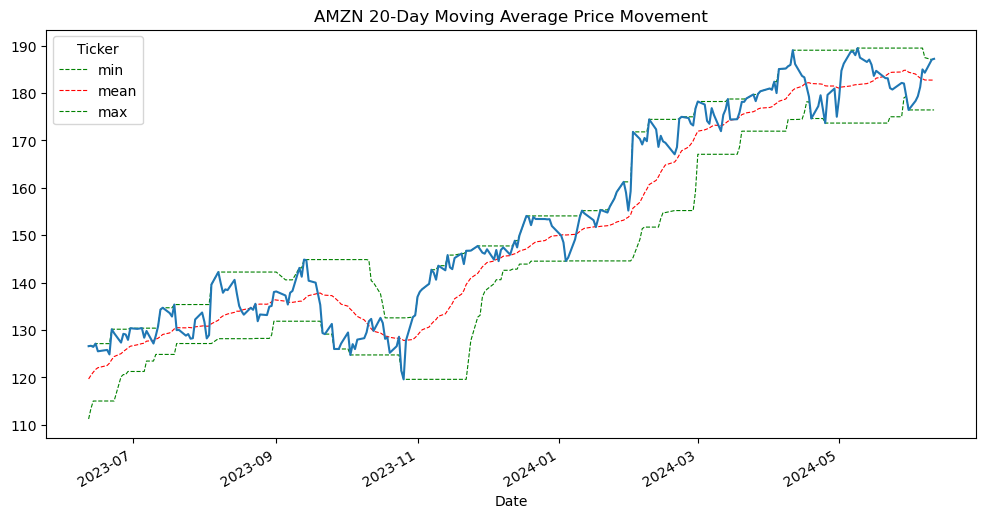

In [18]:
import matplotlib.pyplot as plt

ax = amzn_df[['min', 'mean', 'max']].iloc[-252:].plot(figsize= (12, 6), style=['g--','r--','g--'], lw=0.8)
amzn_df['AMZN'].iloc[-252:].plot(ax=ax)
plt.title("AMZN 20-Day Moving Average Price Movement")
plt.show()

In [19]:
# SMA(Simple Moving Average): 일정 기간동안의 가격의 평균을 나타내는 보조지표
# 1달 영업일을 21일로 가정, 1년 영업일을 252일로 가정

# 단기
amzn_df['SMA1'] = amzn_df['AMZN'].rolling(window=21).mean() #short-term
# 장기
amzn_df['SMA2'] = amzn_df['AMZN'].rolling(window=252).mean() #long-term

amzn_df[['AMZN', 'SMA1', 'SMA2']].tail()

/var/folders/f7/gl6wpvqx5z596rbpjsq5n3tc0000gn/T/ipykernel_55035/3785825841.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  amzn_df['SMA1'] = amzn_df['AMZN'].rolling(window=21).mean() #short-term
/var/folders/f7/gl6wpvqx5z596rbpjsq5n3tc0000gn/T/ipykernel_55035/3785825841.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  amzn_df['SMA2'] = amzn_df['AMZN'].rolling(window=252).mean() #long-term


Ticker,AMZN,SMA1,SMA2
Date,,,
2024-06-05,181.28,183.438571,152.038452
2024-06-06,185.00,183.259524,152.270159
2024-06-07,184.30,183.083333,152.520437
2024-06-10,187.06,182.967143,152.769683
2024-06-11,187.23,182.955238,153.022857


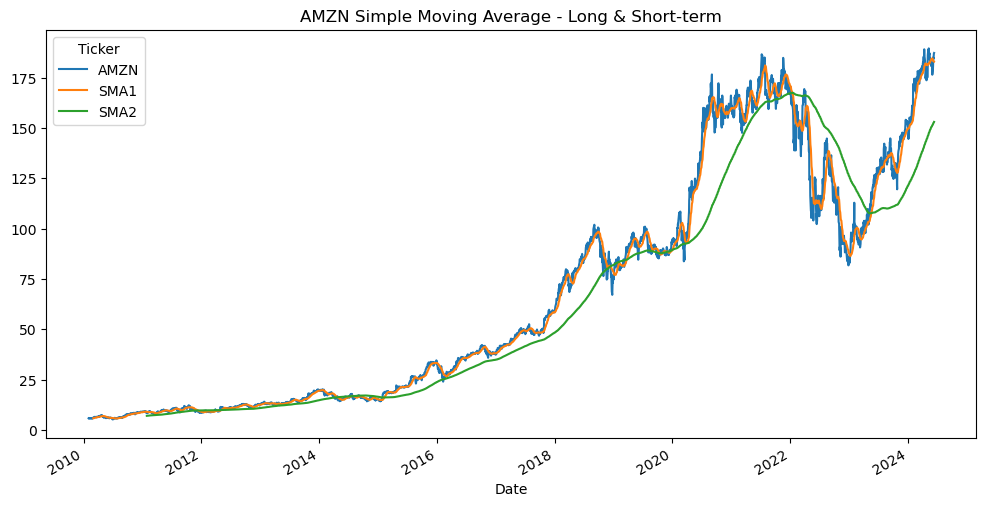

In [20]:
amzn_df[['AMZN', 'SMA1', 'SMA2']].plot(figsize=(12, 6))
plt.title("AMZN Simple Moving Average - Long & Short-term")
plt.show()

/var/folders/f7/gl6wpvqx5z596rbpjsq5n3tc0000gn/T/ipykernel_55035/907941455.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  amzn_df.dropna(inplace=True)
/var/folders/f7/gl6wpvqx5z596rbpjsq5n3tc0000gn/T/ipykernel_55035/907941455.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  amzn_df['positions'] = np.where(amzn_df['SMA1'] > amzn_df['SMA2'], 1, -1)  # 1: buy , -1: sell /


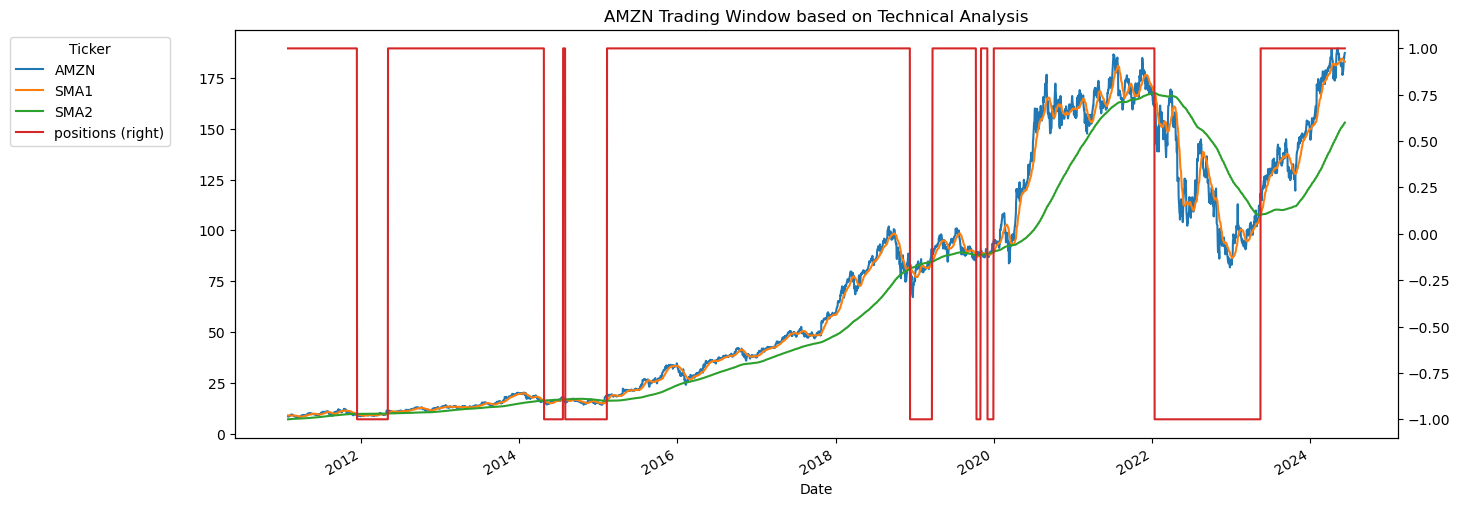

In [21]:
# 아마존 주가 기술 분석
# 골든 크로스, 데드 크로스
amzn_df.dropna(inplace=True)

amzn_df['positions'] = np.where(amzn_df['SMA1'] > amzn_df['SMA2'], 1, -1)  # 1: buy , -1: sell /

ax = amzn_df[['AMZN', 'SMA1', 'SMA2', 'positions']].plot(figsize=(15, 6), secondary_y='positions')
ax.get_legend().set_bbox_to_anchor((-0.05, 1))

plt.title("AMZN Trading Window based on Technical Analysis")
plt.show()

## 다른 문제

In [22]:
import pandas as pd

f_df = pd.read_csv('./datasets/financial_market.csv', index_col='Date',parse_dates=True)
f_df

f_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2216 entries, 2010-01-01 to 2018-06-29
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL.O  2138 non-null   float64
 1   MSFT.O  2138 non-null   float64
 2   INTC.O  2138 non-null   float64
 3   AMZN.O  2138 non-null   float64
 4   GS.N    2138 non-null   float64
 5   SPY     2138 non-null   float64
 6   .SPX    2138 non-null   float64
 7   .VIX    2138 non-null   float64
 8   EUR=    2216 non-null   float64
 9   XAU=    2211 non-null   float64
 10  GDX     2138 non-null   float64
 11  GLD     2138 non-null   float64
dtypes: float64(12)
memory usage: 225.1 KB


In [23]:
# pip install pmdarima

In [24]:
import pmdarima as pm

In [25]:
pre_f_df = f_df.dropna()
pre_f_df

,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N,SPY,.SPX,.VIX,EUR=,XAU=,GDX,GLD
Date,,,,,,,,,,,,
2010-01-04,30.57,30.95,20.88,133.90,173.08,113.33,1132.99,20.04,1.44,1120.00,47.71,109.80
2010-01-05,30.63,30.96,20.87,134.69,176.14,113.63,1136.52,19.35,1.44,1118.65,48.17,109.70
2010-01-06,30.14,30.77,20.80,132.25,174.26,113.71,1137.14,19.16,1.44,1138.50,49.34,111.51
2010-01-07,30.08,30.45,20.60,130.00,177.67,114.19,1141.69,19.06,1.43,1131.90,49.10,110.82
2010-01-08,30.28,30.66,20.83,133.52,174.31,114.57,1144.98,18.13,1.44,1136.10,49.84,111.37
...,...,...,...,...,...,...,...,...,...,...,...,...
2018-06-25,182.17,98.39,50.71,1663.15,221.54,271.00,2717.07,17.33,1.17,1265.00,22.01,119.89
2018-06-26,184.43,99.08,49.67,1691.09,221.58,271.60,2723.06,15.92,1.16,1258.64,21.95,119.26
2018-06-27,184.16,97.54,48.76,1660.51,220.18,269.35,2699.63,17.91,1.16,1251.62,21.81,118.58


In [26]:
amzn_df = pre_f_df[['AMZN.O']].iloc[-252:]
amzn_df

,AMZN.O
Date,
2017-06-30,968.00
2017-07-03,953.66
2017-07-05,971.40
2017-07-06,965.14
2017-07-07,978.76
...,...
2018-06-25,1663.15
2018-06-26,1691.09
2018-06-27,1660.51


In [27]:
y_train = amzn_df['AMZN.O'][:int(0.8 * len(amzn_df))]
y_test = amzn_df['AMZN.O'][int(0.8 * len(amzn_df)):]

<Axes: xlabel='Date'>

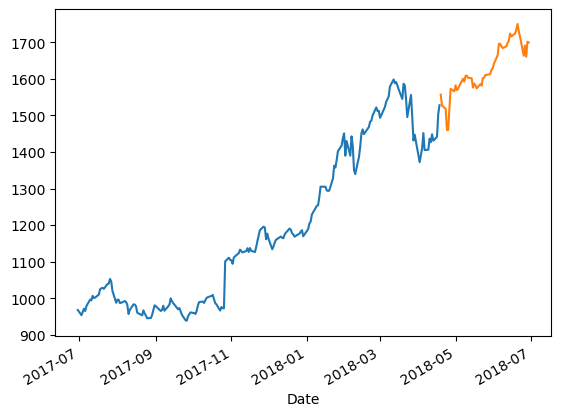

In [28]:
y_train.plot()
y_test.plot()

In [29]:
from pmdarima.arima import ndiffs
# KPSS(Kaiatkowski-Phillips-Schmidt-Shin)
# 차분을 진행하는 것이 필요할 지 결정하기 위해 사용하는 한 가지 검정 방법
# 영가설(귀무가설)을 "데이터의 정상성이 나타난다."로 설정한 뒤 
# 영가설이 거짓이라는 증거를 찾는 알고리즘이다.
# alpha: 강도, max_d: 최대 차분 횟수

kpss_diffs = ndiffs(y_train, alpha=0.05, test='kpss', max_d=6)
adf_diff = ndiffs(y_train, alpha=0.05, test='adf', max_d=6)
pp_diff = ndiffs(y_train, alpha=0.05, test='pp', max_d=6)

# 이 3개 중 최대값을 가져오면 된다.
n_diffs = max(kpss_diffs, adf_diff, pp_diff)

print(f"d = {n_diffs}")


d = 1


In [30]:
# auto_arima: AR, 차분 횟수, MA 차수 확인
# auto_arima 함수는 ARIMA 모델의 최적의 매개변수를 자동으로 찾기 위한 함수입니다.
# y: 훈련시킬 데이터 시계열
# d: 차분 횟수 (시계열 데이터를 정상화하기 위해 필요)
# start_p: AR(p)의 초기값 (AR 모델의 차수의 초기값)
# max_p: AR(p)의 최대값 (AR 모델의 차수의 최대값)
# start_q: MA(q)의 초기값 (MA 모델의 차수의 초기값)
# max_q: MA(q)의 최대값 (MA 모델의 차수의 최대값)
# m: 계절성을 띄는 경우 주기 (계절성 주기 설정)
# seasonal: 계절성을 사용할지 여부 (True 또는 False)
# stepwise: stepwise 알고리즘을 사용할지 여부 (True로 설정하면 자동으로 최적의 모델을 찾음)
# trace: 최적화 과정을 출력할지 여부 (True로 설정하면 과정이 출력됨)

model = pm.auto_arima(y = y_train, 
                      d=1, 
                      start_p=0, 
                      max_p=3, 
                      start_q=0, 
                      max_q=3, 
                      m=1, 
                      seasonal=False, 
                      stepwise=True, 
                      trace=True)


Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1804.108, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1805.964, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1805.951, Time=0.03 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1805.382, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1807.837, Time=0.07 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0] intercept
Total fit time: 0.166 seconds


In [31]:
model.fit(y_train)

ARIMA(order=(0, 1, 0), scoring_args={}, suppress_warnings=True)

In [32]:
# Prob(Q), 융-박스 검정 통계량
# 영가설: 잔차가 백색잡음 시계열을 따른다. ** 백색잡음 : 분포를 잡을 수 있는 정도의 시계열
# 0.05 이상: 서로 독립적이고 동일한 분포를 따른다.

# Prob(H), 이분산성 검정 통계량
# 영가설: 잔차기 이분산성을 띄지 않는다.
# 0.05 이상: 잔차의 분산이 일정하다.

# Prob(JB), 자크-베라 검정 통계량
# 영가설: 잔차가 정규성을 따른다.
# 0.05 이상: 일정한 평균과 분산을 따른다.

# 이 3가지 검증을 가지고 금융 데이터에서 어떤 상품을 추천할 지 예측할 수 있음 (장기적 투가는 고위험, 단기 투자 권장) 이런식으로 작성

# Skew(쏠린 정도, 왜도)
# 0에 가까워야 한다.

# Kurtosis(뾰족한 정도, 첨도)
# 3에 가까워야 한다.

print(model.summary())

# N(0, 1) 정규분포

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  201
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -900.054
Date:                Wed, 12 Jun 2024   AIC                           1804.108
Time:                        11:36:41   BIC                           1810.705
Sample:                             0   HQIC                          1806.777
                                - 201                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      2.7992      1.552      1.804      0.071      -0.243       5.841
sigma2       474.6903     22.900     20.729      0.000     429.807     519.573
Ljung-Box (L1) (Q):                   0.15   Jarque-

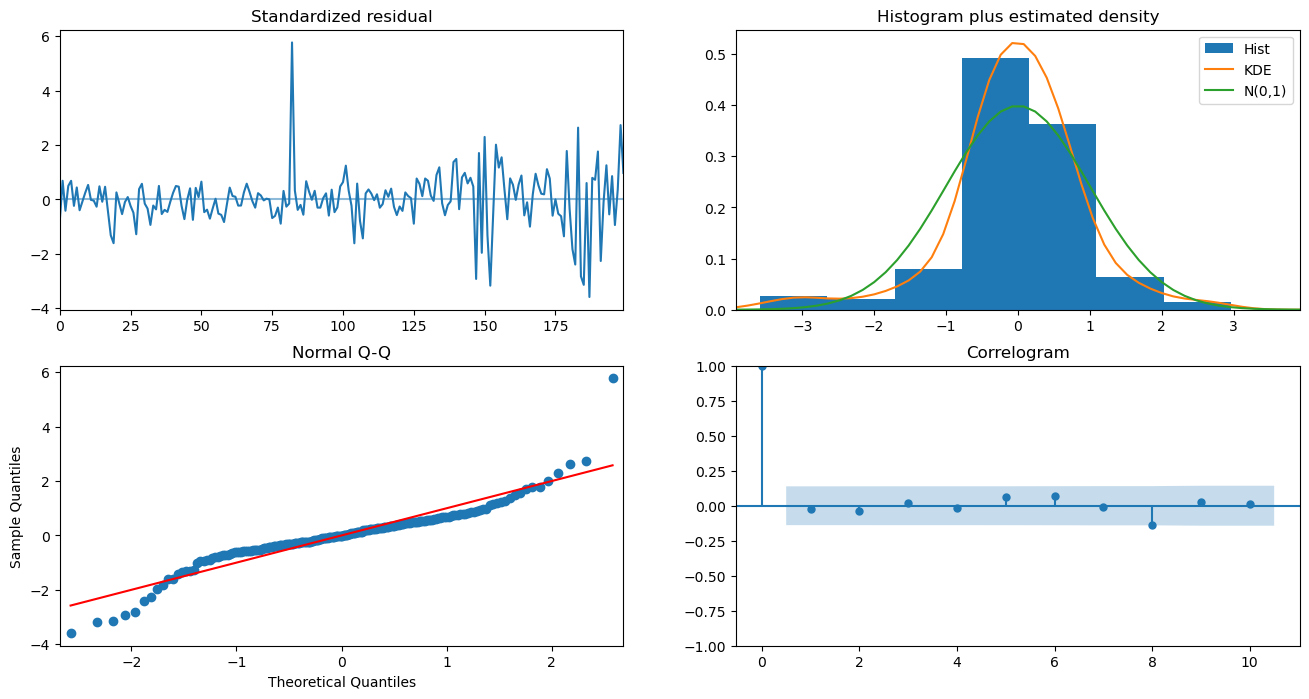

In [33]:
import matplotlib.pyplot as plt

model.plot_diagnostics(figsize=(16, 8))
plt.show()

In [34]:
# y_test를 아는 것 만큼 비교가 가능하기 때문에 predict 진행 시 주기를 적어준다.
# 이건 잘못된 경우 : 다음 차수 1개에 대한 패턴으로 계속 신뢰구간이 증가되며
# 정상적으로 할때는 다음 차수의 값을 결정한 후 추가 update를 해줘야 함

# 현재는 유사한 양상으로 약 3 정도가 지속적으로 증가함.
prediction = model.predict(len(y_test))
prediction

/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


201    1530.6392
202    1533.4384
203    1536.2376
204    1539.0368
205    1541.8360
206    1544.6352
207    1547.4344
208    1550.2336
209    1553.0328
210    1555.8320
211    1558.6312
212    1561.4304
213    1564.2296
214    1567.0288
215    1569.8280
216    1572.6272
217    1575.4264
218    1578.2256
219    1581.0248
220    1583.8240
221    1586.6232
222    1589.4224
223    1592.2216
224    1595.0208
225    1597.8200
226    1600.6192
227    1603.4184
228    1606.2176
229    1609.0168
230    1611.8160
231    1614.6152
232    1617.4144
233    1620.2136
234    1623.0128
235    1625.8120
236    1628.6112
237    1631.4104
238    1634.2096
239    1637.0088
240    1639.8080
241    1642.6072
242    1645.4064
243    1648.2056
244    1651.0048
245    1653.8040
246    1656.6032
247    1659.4024
248    1662.2016
249    1665.0008
250    1667.8000
251    1670.5992
dtype: float64

In [35]:
# 신뢰구간의 평균값이 예측값이다.
prediction, conf_int = model.predict(n_periods =1, return_conf_int=True)
print(conf_int)
print(prediction)


[[1487.93670256 1573.34169744]]
201    1530.6392
dtype: float64


/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [36]:
# 지속적으로 업데이트를 하기 위한 방법 (예측은 한발자국씩 진행되어야 함)
prediction.tolist()[0]

1530.6391999999998

In [37]:
# 지속적으로 업데이트를 하기 위한 방법 (예측은 한발자국씩 진행되어야 함)
def predict_one_step():
    prediction = model.predict(n_periods =1)
    return (prediction.tolist()[0])

In [38]:
preds = []
p_list = []

for data in y_test:
    p = predict_one_step()
    p_list.append(p)

    model.update(data)
    
    

/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [39]:
y_predict_df = pd.DataFrame({"test": y_test, "pred": p_list})
y_predict_df

,test,pred
Date,,
2018-04-19,1556.91,1530.639200
2018-04-20,1527.49,1559.839884
2018-04-23,1517.86,1530.259735
2018-04-24,1460.09,1520.568672
2018-04-25,1460.17,1462.502032
2018-04-26,1517.96,1462.573566
2018-04-27,1572.62,1520.629841
2018-04-30,1566.13,1575.540986
2018-05-01,1582.26,1569.005625


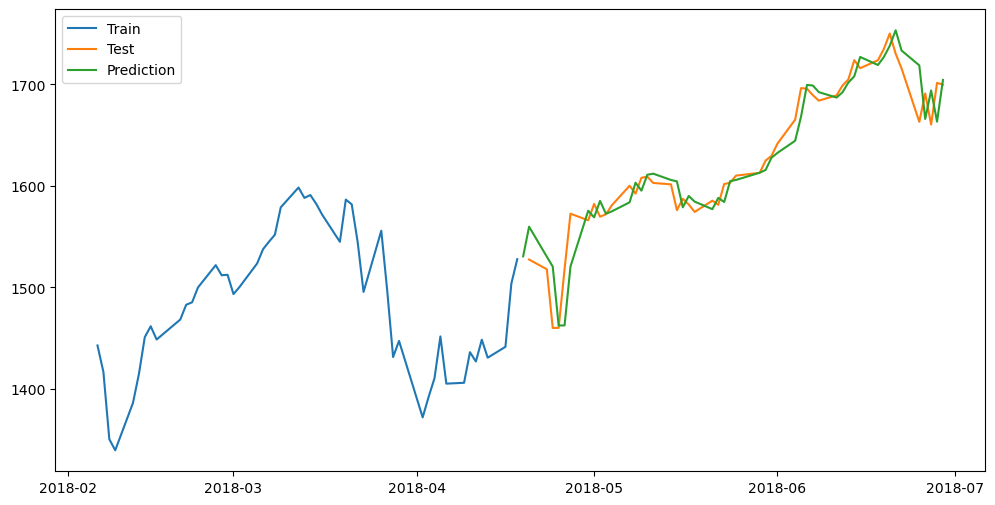

In [40]:
fig, ax = plt.subplots(1, 1, figsize=(12, 6))

plt.plot(y_train.iloc[-50:], label='Train')
plt.plot(y_test.iloc[-50:], label='Test')
plt.plot(y_predict_df.pred, label='Prediction')
plt.legend()
plt.show()

In [41]:
import numpy as np

def MAPE(y_test, y_pred):
    return np.mean(np.abs((y_test - y_pred) / y_test)) * 100

print(f'MAPE (%): {MAPE(y_test, p_list):.4f}')

MAPE (%): 0.9589
